# Cellular automota

```{contents} Table of Contents
:depth: 3
```

## Intro

Cellular automata suppose that a set of hosts is arranged on a grid, called a lattice.
For a cellular automata, we are asked to simulate the number of individuals in each of the possible supposed disease states over time.
Most---if not all---cellular automata are stochastic.
The two cellular automata models that we will look at (inspired again by Keeling and Rohani) are the contact process model introduced by Theodore Harris in 1974 and the "Forest Fire" model introduced by Bak et. al in 1990. 

To be clear, cellular automata typically do not accurately represent real-life epidemic spread. 
Instead, we can extract from these models principles about how disease spreads, and attempt to find these (potentially unifying) principles in nature. 

## Contact process model 

Consider a single row of $L$ squares, called a 1-dimensional lattice. 
Each square in the lattice represents on host who can be in one of two disease states: susceptible (S) and infected (I). 
An infector will transmit disease at the rate $\beta$ infections per time unit, and the infectors will recover at a rate $\gamma$ recoveries per time unit.
Importantly, a susceptible host can only be infected if they are next to an infector---otherwise they cannot be infected. 
This makes clear that the (cellular) contact process model is a spatial model. 

To begin this process, we select, at random, a single square to be infected. 

How should we proceed for simulating this stochastic process? 

Gillespie's algorithm is a straightforward approach for simulating this process. 
We first need to define the events that can take place. 
In the previous models for which we used Gillespie's algorithm, all the individuals were assumed to be mixed and in contact with everyone in the system. 
Because of this assumption we needed to define an event for infection and an event for recovery.

However, the (cellular) contact process model is spatial, and the events now depend on where they take place. 
At each time unit $t$, we can collect the events that take place by looking at each host (each square in the model) and assessing whether that host can be infected or, if infected, then can recover. 

Start with an empty list of events and begin iterating through hosts. 
If a host is next to an infector then they can be infected with rate $\beta$, and we will append that event to the list 
If a host is infected already then they can recover with rate $\gamma$, and we will append that event to the list. 

An example list of events, $E$, may look like $E$ = [  (3,"recover"), (2,"infect"), (4,"infect")  ].
Here there are three events: host 3 is infected and can recover at rate $\gamma$.
Because host 3 is infected, host 2 is susceptible and can be infected at rate $\beta$ and host 4 is susceptible and can be infected at rate $\beta$. 

This process can be implemented in Python 

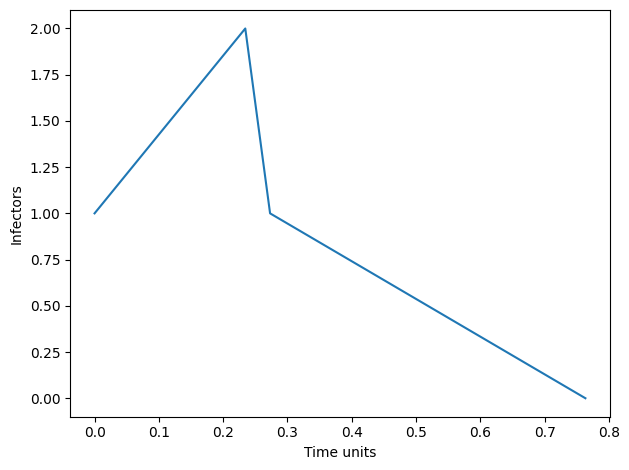

In [122]:
import numpy as np
import matplotlib.pyplot as plt 


L       = 50        #--L sites
beta    = 2.0       #--transmission rate 
gamma   = 1.0       #--recovery rate

#--Pick how long to run the simulation. 
T       = 100
time    = 0

sites = np.zeros(L) #--Long grid of zeros 

#--pick at random one site to be infected. 
#--Infections will be assigned the value one and susceptible the value zero. 
pick_first_infection_site        = np.random.choice(L)
sites[pick_first_infection_site] = 1. 


#--We will record the number of infectors over time and time increments 
I     = [1]
times = [0]

while time < T:
    # sum up rates for all possible events
    events         = []
    event_rates    = [] 
    
    for site in range(L):
        if sites[site]==0:
            if sites[max(0,site-1)]==1 or sites[min(site+1,L-1)]==1:
                events.append( (site,'infected') )
                event_rates.append( beta )
        elif sites[site] == 1:
                events.append( (site,'recover') )
                event_rates.append( gamma )
    #--Extinction
    if events == []:
        break 
    total = sum(event_rates)    

    time_increment = np.random.exponential(1./total)
    time+=time_increment

    event_chosen = np.random.choice(len(event_rates), p = np.array(event_rates)/total )

    site, event_type = events[event_chosen]
    if event_type == "infected":
        sites[site]=1
    elif event_type=="recover":
        sites[site]=0
        
    times.append(time)
    I.append(sum(sites))


fig, ax = plt.subplots()
ax.plot(times,I)

ax.set_xlabel("Time units")
ax.set_ylabel("Infectors")

fig.set_tight_layout(True)
plt.show()

## Importance of spatial structure and visualization 

Though the number of infectors over time is often of interest, the (cellular) contact process model exhibits complex spatial structures for a simple---remember this model is 1-dimensional---model of an infection process.  

To visualize infections in space and time we will record the number of infected across the $L$ lattice sites for each time step $t$. 
The end result will be a grid where the rows represent time and the columns represent the $L$ hosts in the susceptible disease state (white squares) or the infected disease state (black squares). 

([], [])

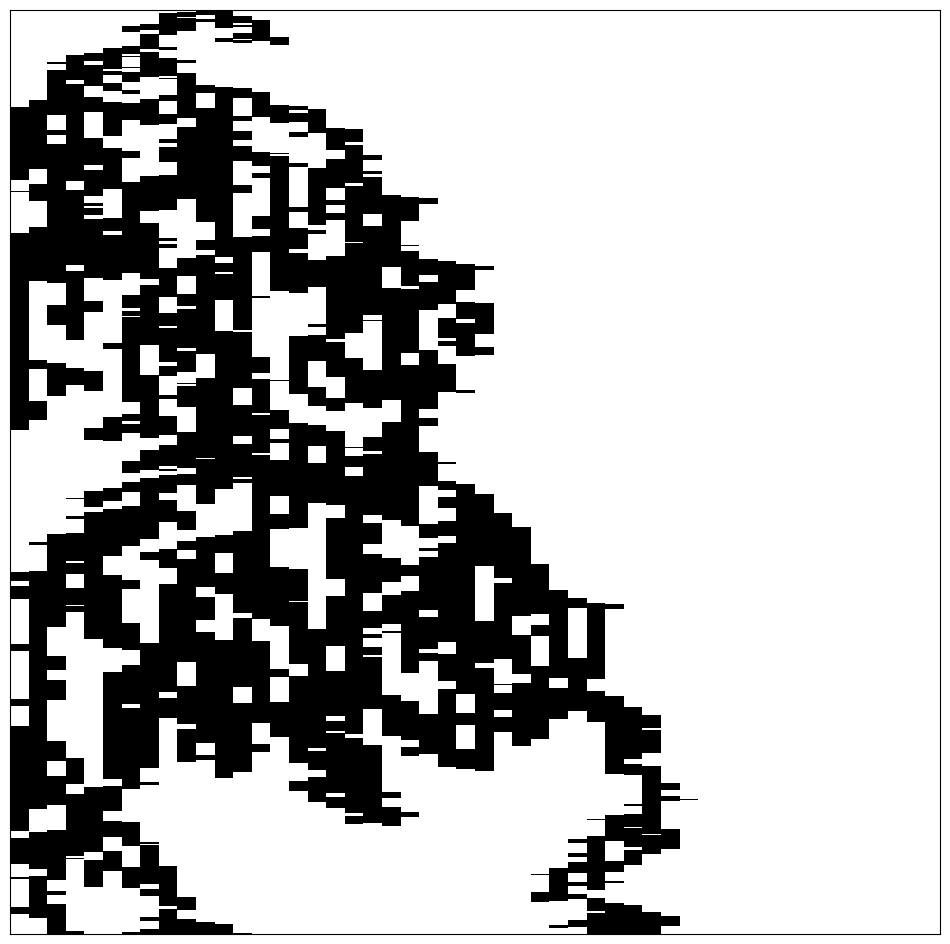

In [123]:
def contact_process(L=50,beta=2,gamma=1, T = 100):
    import numpy as np
    time    = 0
    
    sites = np.zeros(L) #--Long grid of zeros 
    
    #--pick at random one site to be infected. 
    #--Infections will be assigned the value one and susceptible the value zero. 
    pick_first_infection_site        = np.random.choice(L)
    sites[pick_first_infection_site] = 1. 
    
    #--We will record the number of infectors over time and time increments 
    I     = [1]
    times = [0]
    infectors = [ sites.copy() ]
    
    while time < T:
        # sum up rates for all possible events
        events         = []
        event_rates    = [] 
        
        for site in range(L):
            if sites[site]==0:
                if sites[max(0,site-1)]==1 or sites[min(site+1,L-1)]==1:
                    events.append( (site,'infected') )
                    event_rates.append( beta )
            elif sites[site] == 1:
                    events.append( (site,'recover') )
                    event_rates.append( gamma )
        #--Extinction
        if events == []:
            break 
        total = sum(event_rates)    
    
        time_increment = np.random.exponential(1./total)
        time+=time_increment
    
        event_chosen = np.random.choice(len(event_rates), p = np.array(event_rates)/total )
    
        site, event_type = events[event_chosen]
        if event_type == "infected":
            sites[site]=1
        elif event_type=="recover":
            sites[site]=0
            
        times.append(time)
        I.append(sum(sites))
        infectors.append(sites.copy().astype(int))
    return times,I,infectors

#--plot the spatial dynamics over time 
plt.figure(figsize=(12, 12))
plt.imshow(infectors, cmap='gray_r', aspect='auto',interpolation='none')
plt.xticks([])  # remove ticks
plt.yticks([])

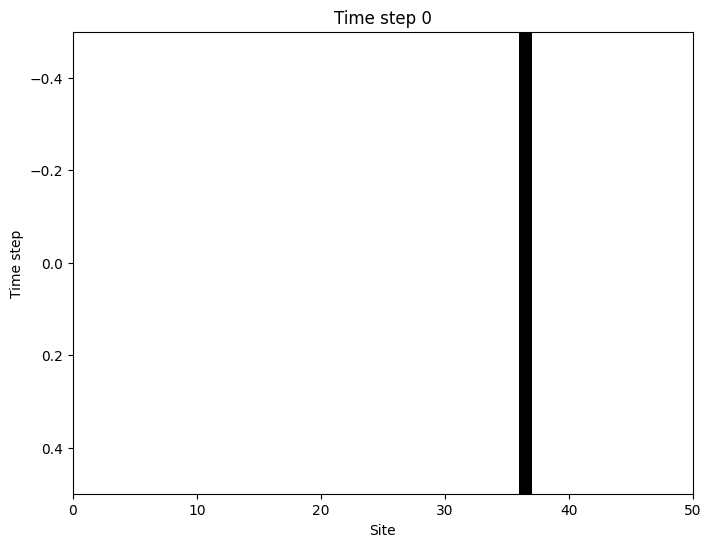

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def contact_process(L=50, beta=2, gamma=1, T=50):
    sites = np.zeros(L, dtype=int)
    sites[np.random.choice(L)] = 1
    infectors = [sites.copy()]
    time = 0
    while time < T:
        events, rates = [], []
        for i in range(L):
            if sites[i] == 1:
                events.append((i, 'recover'))
                rates.append(gamma)
            else:
                left = sites[i - 1] if i > 0 else 0
                right = sites[i + 1] if i < L - 1 else 0
                if left == 1 or right == 1:
                    events.append((i, 'infect'))
                    rates.append(beta)
        if not events:
            break
        total = sum(rates)
        dt = np.random.exponential(1 / total)
        time += dt
        chosen = np.random.choice(len(events), p=np.array(rates) / total)
        i, action = events[chosen]
        sites[i] = 1 if action == 'infect' else 0
        infectors.append(sites.copy())
    return infectors

infectors = contact_process(L=50, beta=2, gamma=1, T=30)

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
data = np.zeros((1, len(infectors[0])))  # initialize empty frame
im = ax.imshow(data, cmap='gray_r', aspect='auto', vmin=0, vmax=1,interpolation='none')

ax.set_xlabel('Site')
ax.set_ylabel('Time step')
title = ax.set_title("Building Infection Timeline")

# Update function
def update(frame):
    current = np.array(infectors[:frame + 1])
    im.set_data(current)
    im.set_extent([0, len(infectors[0]), frame + 0.5, -0.5])  # scrolls down
    title.set_text(f"Time step {frame}")
    return [im, title]

ani = animation.FuncAnimation(fig, update, frames=len(infectors), interval=100, blit=False)

# Render in Jupyter
HTML(ani.to_jshtml())

## Homework 

1. Code-up a stochastic SIS model. This model assumes that everyone comes in contact with everyone else at each time step. When an individual recovers they become susceptible again immediately. We assume that infections occur at a rate of $\beta S I /N$. Run this model once for $N=100$ individuals, transmission rate $\beta=1.5$, recovery rate $\gamma = 1$, and for 250 time steps. Begin this stochastic process with $I_{0}=1$ infector in the system.   
Plot the number of infectors over time (to ensure you are coding this up correctly). 

2. We will compare the frequency and size of outbreaks between the SIS model above (in 1) and the (cellular) contact process model.
Run the SIS model 500 times and record the number of infectors at the final time step. Complete the same process for the (cellular) contact process model. Produce a complementary cumulative distribution function for the number of final infectors. Why are these curves different? What are the potential contributing factors towards this observed difference? 
